# Imports

In [1]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 716.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=61f6de4439bb2fb3f7bf33fb87ca8f58d71666f06a6da85715f2e581b60a1106
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [3]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0
    Uninstalling transformers-4.40.0:
      Successfully uninstalled transformers-4.40.0


In [5]:
pip install -U sacremoses


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 11.2 MB/s eta 0:00:00


In [6]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]=""

In [7]:
import json
import yaml
import numpy as np
import pandas as pd
import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import statistics
import matplotlib.pyplot as plt
from collections import Counter
from torch import nn
import torch
from pathlib import Path
import re
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification, EarlyStoppingCallback
import evaluate

# Extraction

In [8]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
by_columns = False

In [11]:
with open('tokens.yml', encoding="utf8") as f:
    tokens = yaml.safe_load(f)

In [12]:
label_to_class = {key:value["start"] for key, value in tokens.items()}
class_to_label = {value["start"]:key for key, value in tokens.items()}
class_to_label

{'Ⓐ': 'age',
 'Ⓑ': 'birth_date',
 'Ⓒ': 'civil_status',
 'Ⓓ': 'education_level',
 'Ⓔ': 'employer',
 'Ⓕ': 'firstname',
 'Ⓗ': 'link',
 'Ⓘ': 'lob',
 'Ⓙ': 'maiden_name',
 'Ⓚ': 'nationality',
 'Ⓛ': 'observation',
 'Ⓜ': 'occupation',
 'Ⓞ': 'surname',
 'Ⓟ': 'surname_household'}

In [13]:
len(class_to_label)

14

In [14]:
def read_docs(file_path):
    ''' Open the json file and parse it to return tags and texts '''
    with open(file_path) as f:
        raw_docs = json.load(f)

    token_docs = []
    tag_docs = []
    for key, doc in tqdm.tqdm(raw_docs.items()):
        token_list = []
        tag_list = []
        if doc != "":
            for line in doc.split('\n'):
                formatted_line = re.split('\s?(Ⓐ|Ⓑ|Ⓒ|Ⓓ|Ⓔ|Ⓕ|Ⓗ|Ⓘ|Ⓙ|Ⓚ|Ⓛ|Ⓜ|Ⓞ|Ⓟ)', line)
                sentence, tags = formatted_line[2::2], formatted_line[1::2]
                if by_columns:
                    token_list.extend(sentence)
                    tags=[class_to_label[tag] for tag in tags]
                    tag_list.extend(tags)
                else:
                    for words, tag in zip(sentence, tags):
                        tokens = words.split(' ')
                        token_list.extend(tokens)
                        n = len(tokens)
                        tag=class_to_label[tag]
                        matching_tags = [str(tag)]*n
                        tag_list.extend(matching_tags)
                token_list.append(".")
                tag_list.append("O")
            token_docs.append(token_list)
            tag_docs.append(tag_list)

    return token_docs, tag_docs

texts, tags = read_docs('entities.json')

100%|██████████| 1218/1218 [00:01<00:00, 725.26it/s]


In [15]:
print(texts[0][0:50], tags[0][0:50], sep='\n')

['Breton', 'Cyrille', 'menuisier', '25', 'Garçon', 'française', '.', 'Ferazzi', 'Auguste', 'vitrier', '30', 'Garçon', 'Piémontaise', '.', 'Machol', 'Pierre', 'vitrier', '24', 'Garçon', 'Piémontaise', '.', 'Desbois', 'Alexandre', 'prop', 're', '48', 'Homme', 'marié', 'française', '.', 'Vignat', 'Zélie', 'prop', 're', 'sa', 'fe', '30', 'française', '.', 'Houy', 'Caroline', 'domestique', '24', 'Fille', 'française', '.', 'Violet', 'Esther', 'fe', 'de']
['surname', 'firstname', 'occupation', 'age', 'civil_status', 'nationality', 'O', 'surname_household', 'firstname', 'occupation', 'age', 'civil_status', 'nationality', 'O', 'surname_household', 'firstname', 'occupation', 'age', 'civil_status', 'nationality', 'O', 'surname_household', 'firstname', 'occupation', 'occupation', 'age', 'civil_status', 'civil_status', 'nationality', 'O', 'surname', 'firstname', 'occupation', 'occupation', 'link', 'link', 'age', 'nationality', 'O', 'surname', 'firstname', 'occupation', 'age', 'civil_status', 'natio

In [16]:
# Number of docs
print("There are ", len(texts), " documents.")

There are  851  documents.


In [17]:
# Average number of lines per doc
print("Average : ", statistics.mean([len(text) for text in texts]), " words by document")

Average :  238.24089306698002  words by document


In [18]:
print("Minimum : ", min([len(text) for text in texts]), " words by document.")

Minimum :  7  words by document.


In [19]:
print("Maximum : ", max([len(text) for text in texts]), " words by document.")

Maximum :  400  words by document.


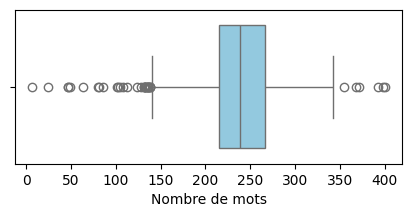

In [20]:
plt.figure(figsize=(5, 2))

# Creating a boxplot using Seaborn
sns.boxplot(data=[len(text) for text in texts], orient='h', color='skyblue')

# Adding labels
plt.xlabel('Nombre de mots')

# Displaying the plot
plt.show()

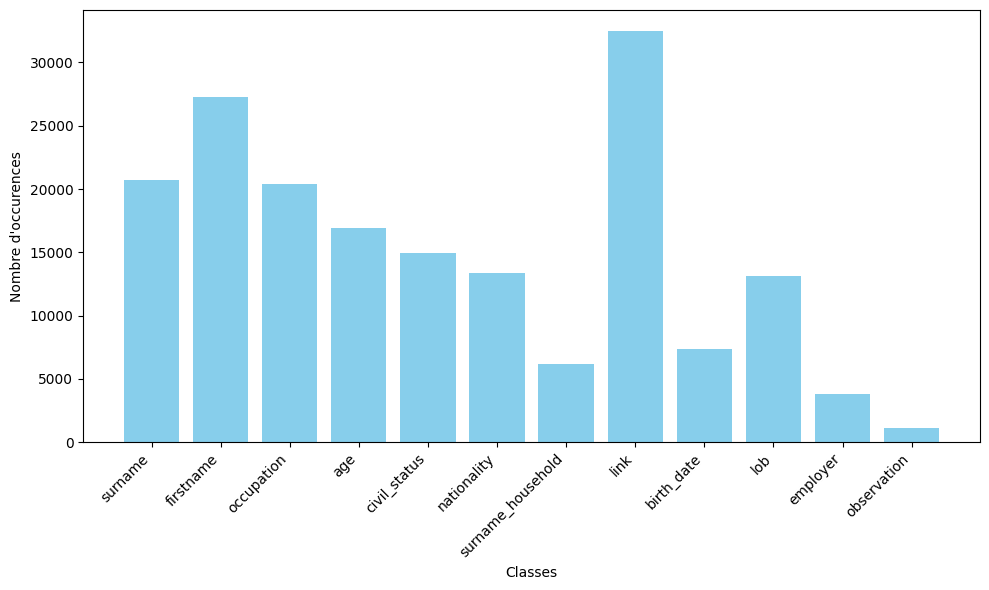

In [21]:
flattened_labels = [elt for tag in tags for elt in tag if elt != "O"]

# Count the occurrences of each occupation
occupation_counts = Counter(flattened_labels)

# Separate the occupations and their corresponding counts
occupations = list(occupation_counts.keys())
counts = list(occupation_counts.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(occupations, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel("Nombre d'occurences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Preprocessing

In [22]:
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.3)
val_texts, test_texts, val_tags, test_tags = train_test_split(test_texts, test_tags, test_size=.5)

In [23]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
nb = tag2id["O"]
for tag, id in tag2id.items():
    if id > nb:
        tag2id[tag] = id-1
tag2id["O"] = len(tag2id)-1
id2tag = {id: tag for tag, id in tag2id.items()}

In [24]:
id2tag

{12: 'O',
 0: 'firstname',
 1: 'surname_household',
 2: 'civil_status',
 3: 'lob',
 4: 'occupation',
 5: 'birth_date',
 6: 'age',
 7: 'surname',
 8: 'link',
 9: 'observation',
 10: 'nationality',
 11: 'employer'}

In [25]:
y = [tag2id[tag] for doc in tags for tag in doc]
class_weights=compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights=torch.tensor(class_weights,dtype=torch.float).to(device)

In [26]:
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")

tokenizer_config.json:   0%|          | 0.00/269 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/892 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

In [27]:
def tokenize_and_align_labels(text, tags, truncation=True, padding=True):
    tokenized_inputs = tokenizer(text, truncation=truncation, is_split_into_words=True, padding=padding)

    labels = []
    for i, label in enumerate(tags):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(tag2id[label[word_idx]])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [30]:
encodings = tokenize_and_align_labels(texts, tags, truncation=False, padding=False)
# Average number of tokens per doc
print("Average : ", statistics.mean([len(tokens) for tokens in encodings["input_ids"]]), " number of tokens")
max([len(tokens) for tokens in encodings["input_ids"]])

Token indices sequence length is longer than the specified maximum sequence length for this model (533 > 512). Running this sequence through the model will result in indexing errors


Average :  350.07873090481786  number of tokens


577

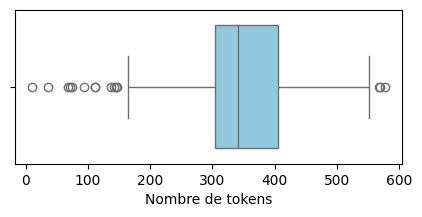

In [31]:
plt.figure(figsize=(5, 2))

# Creating a boxplot using Seaborn
sns.boxplot(data=[len(tokens) for tokens in encodings["input_ids"]], orient='h', color='skyblue')

# Adding labels
plt.xlabel('Nombre de tokens')

# Displaying the plot
plt.show()

In [32]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings)

# Naive method

In [33]:
def split(tag_docs):
    splitted_tags = []
    row_tags = []
    for tags in tag_docs:
        for tag in tags:
            if tag == "O":
                splitted_tags.append(row_tags)
                row_tags = []
            else:
                row_tags.append(tag2id[tag])
    return splitted_tags

In [34]:
def most_probable_class(tags):
    splitted_tags = split(tags)
    max_length = max([len(tags) for tags in splitted_tags])
    most_probable_class_lst = np.zeros((max_length, len(unique_tags)-1))
    for tags in splitted_tags:
        for i, tag in enumerate(tags):
            most_probable_class_lst[i, tag] += 1
    most_probable_class_probabilities = most_probable_class_lst / most_probable_class_lst.sum(axis=1).reshape(-1, 1)
    return most_probable_class_probabilities
most_probable_class_probabilities = most_probable_class(train_tags)

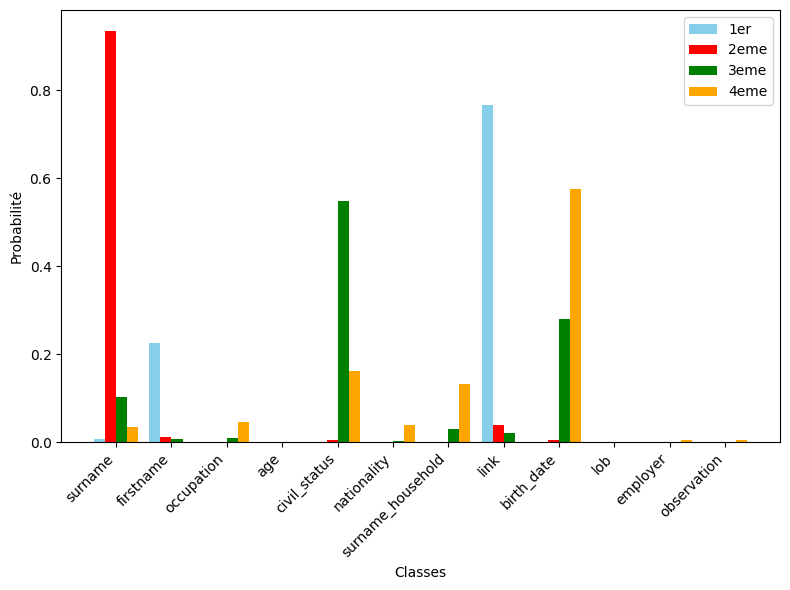

In [35]:
plt.figure(figsize=(8, 6))

positions = np.arange(len(occupations))
bar_width = 0.2

plt.bar(positions - 1.5 * bar_width, most_probable_class_probabilities[0], bar_width, color='skyblue', label='1er')
plt.bar(positions - 0.5 * bar_width, most_probable_class_probabilities[1], bar_width, color='red', label='2eme')
plt.bar(positions + 0.5 * bar_width, most_probable_class_probabilities[2], bar_width, color='green', label='3eme')
plt.bar(positions + 1.5 * bar_width, most_probable_class_probabilities[3], bar_width, color='orange', label='4eme')

plt.xlabel('Classes')
plt.ylabel("Probabilité")
plt.xticks(positions, occupations, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

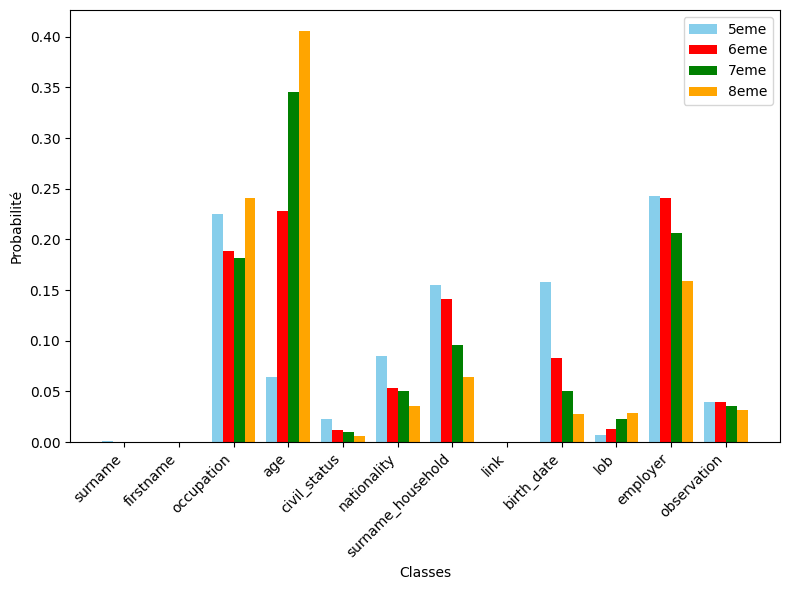

In [36]:
plt.figure(figsize=(8, 6))

positions = np.arange(len(occupations))
bar_width = 0.2

plt.bar(positions - 1.5 * bar_width, most_probable_class_probabilities[5], bar_width, color='skyblue', label='5eme')
plt.bar(positions - 0.5 * bar_width, most_probable_class_probabilities[6], bar_width, color='red', label='6eme')
plt.bar(positions + 0.5 * bar_width, most_probable_class_probabilities[7], bar_width, color='green', label='7eme')
plt.bar(positions + 1.5 * bar_width, most_probable_class_probabilities[8], bar_width, color='orange', label='8eme')

plt.xlabel('Classes')
plt.ylabel("Probabilité")
plt.xticks(positions, occupations, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
def naive_eval(tags, most_probable_class_probabilities):
    ''' Naive evaluation strategy using the distribution at the given place in the sentence '''
    splitted_tags = split(tags)
    n = len(unique_tags)-1
    pred_tags = []
    true_tags = []
    for tags in splitted_tags:
        length_sentence = len(tags)
        for i in range(len(tags)):
            pred_tags.append(id2tag[np.random.choice(n, p=most_probable_class_probabilities[i])])
            true_tags.append(id2tag[tags[i]])
        pred_tags.append("O")
        true_tags.append("O")
    return true_tags, pred_tags

true_tags, pred_tags = naive_eval(test_tags, most_probable_class_probabilities)

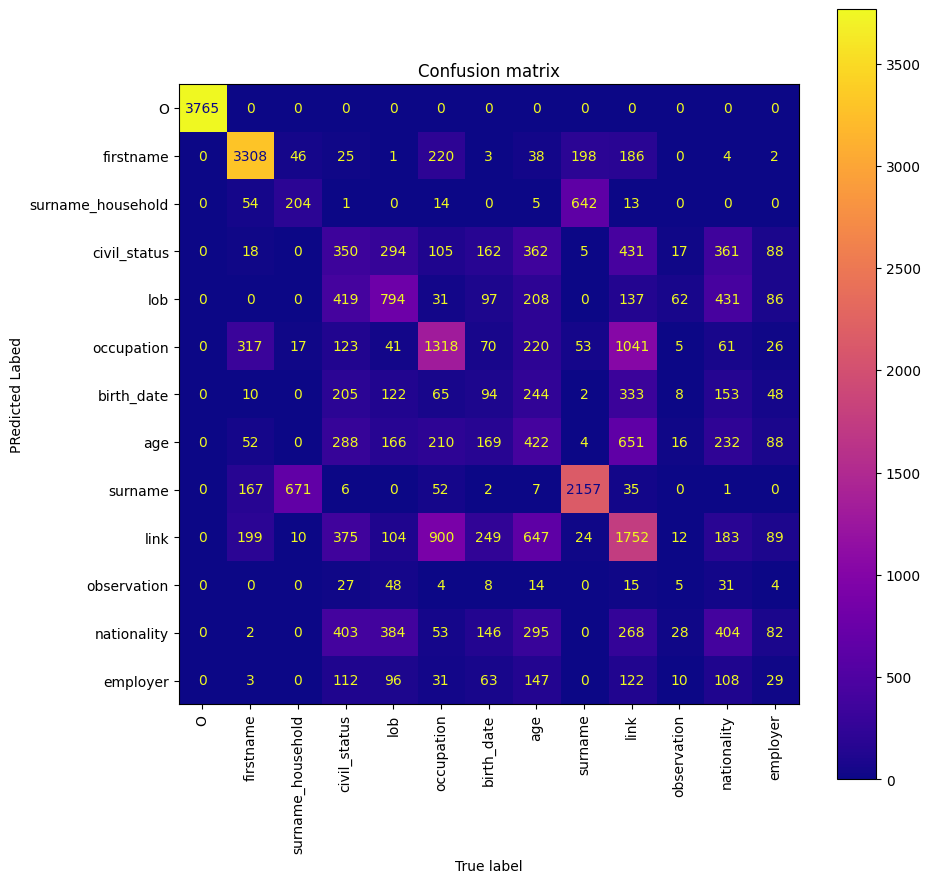

In [38]:
labels_list = list(tag2id)
cm = confusion_matrix(true_tags, pred_tags, labels=labels_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical', cmap="plasma")
ax.set_xlabel('True label')
ax.set_ylabel('PRedicted Labed')

# Set title
plt.title("Confusion matrix")
plt.show()

In [39]:
print(classification_report(true_tags, pred_tags, labels=labels_list))

                   precision    recall  f1-score   support

                O       1.00      1.00      1.00      3765
        firstname       0.80      0.82      0.81      4031
surname_household       0.22      0.22      0.22       933
     civil_status       0.15      0.16      0.15      2193
              lob       0.39      0.35      0.37      2265
       occupation       0.44      0.40      0.42      3292
       birth_date       0.09      0.07      0.08      1284
              age       0.16      0.18      0.17      2298
          surname       0.70      0.70      0.70      3098
             link       0.35      0.39      0.37      4544
      observation       0.03      0.03      0.03       156
      nationality       0.21      0.20      0.20      2065
         employer       0.05      0.04      0.05       721

         accuracy                           0.48     30645
        macro avg       0.35      0.35      0.35     30645
     weighted avg       0.48      0.48      0.48     3

# BERT Transformer

## Training

In [41]:
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.2)
val_texts, test_texts, val_tags, test_tags = train_test_split(test_texts, test_tags, test_size=.5)

# model = "Jean-Baptiste/camembert-ner"
# model = "Davlan/distilbert-base-multilingual-cased-ner-hrl"
model = "dslim/bert-base-NER"

tokenizer = AutoTokenizer.from_pretrained(model)

train_encodings = tokenize_and_align_labels(train_texts, train_tags)
val_encodings = tokenize_and_align_labels(val_texts, val_tags)
test_encodings = tokenize_and_align_labels(test_texts, test_tags)

train_dataset = Dataset(train_encodings)
val_dataset = Dataset(val_encodings)
test_dataset = Dataset(test_encodings)

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

model = AutoModelForTokenClassification.from_pretrained(
    model, num_labels=len(id2tag), id2label=id2tag, label2id=tag2id, ignore_mismatched_sizes=True
)

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at dslim/bert-base-NER and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([9]) in the checkpoint and torch.Size([13]) in the model instantiated
- classifier.weight: found shape torch.Size([9, 768])

In [42]:
class CustomTrainerForClassImbalance(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get('logits')
        # compute custom loss
        loss_fct = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [43]:
seqeval = evaluate.load("seqeval")

def compute_metrics(p, return_pred_labels=False):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [id2tag[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2tag[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    if return_pred_labels:
      return {
          "precision": results["overall_precision"],
          "recall": results["overall_recall"],
          "f1": results["overall_f1"],
          "accuracy": results["overall_accuracy"],
          "labels":true_labels,
          "predictions":true_predictions
      }
    else:
      return {
          "precision": results["overall_precision"],
          "recall": results["overall_recall"],
          "f1": results["overall_f1"],
          "accuracy": results["overall_accuracy"],
          }

In [44]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=5e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=100,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=5,
    metric_for_best_model="accuracy",
    load_best_model_at_end=True
    )

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
    )

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,2.274507,0.192420,0.099248,0.130952,0.230678
2,No log,1.917788,0.500000,0.404511,0.447215,0.600476
3,No log,1.665157,0.576029,0.484211,0.526144,0.657551
4,No log,1.463390,0.666667,0.589474,0.625698,0.721760
5,No log,1.291912,0.696398,0.610526,0.650641,0.740785
6,No log,1.154605,0.723549,0.637594,0.677858,0.759810
7,No log,1.049168,0.742857,0.664662,0.701587,0.775268
8,No log,0.967401,0.750411,0.687218,0.717425,0.785969
9,No log,0.901635,0.769841,0.729323,0.749035,0.810939
10,No log,0.855802,0.776378,0.741353,0.758462,0.820452


TrainOutput(global_step=21, training_loss=0.7896301632835752, metrics={'train_runtime': 205.9314, 'train_samples_per_second': 1.942, 'train_steps_per_second': 0.486, 'total_flos': 21951110393856.0, 'train_loss': 0.7896301632835752, 'epoch': 21.0})

## Eval

In [45]:
with torch.no_grad():
    for i, data in enumerate(test_dataset):
        inputs = data["input_ids"].unsqueeze(0).to(device)
        attention_masks = data["attention_mask"].unsqueeze(0).to(device)
        logits = model(inputs, attention_masks).logits.detach().cpu()
        if i == 0:
            predictions = logits
            labels = data["labels"].unsqueeze(dim=0)
        else:
            predictions = torch.concatenate((predictions, logits), dim=0)
            labels = torch.concatenate((labels, data["labels"].unsqueeze(dim=0)), dim=0)

    p = (np.array(predictions), np.array(labels))
    dic = compute_metrics(p, return_pred_labels=True)
    accuracy = dic["accuracy"]
    true_labels = dic["labels"]
    true_predictions = dic["predictions"]
print(accuracy)

0.8187834054466785


In [46]:
def merge_tokens(true_predictions, true_labels):
    merged_true_predictions = []
    merged_true_labels = []
    old_elt = -1
    pred_list_possible = []
    for elt_preds, elt_labels in zip(true_predictions, true_labels):
        for elt_pred, elt_label in zip(elt_preds, elt_labels):
            if old_elt == -1:
                old_elt = elt_label
                pred_list_possible = [elt_pred]
            elif elt_label == old_elt:
                pred_list_possible.append(elt_pred)
            else:
                merged_true_labels.append(old_elt)
                old_elt = elt_label
                merged_true_predictions.append(max(pred_list_possible,key=pred_list_possible.count))
                pred_list_possible = [elt_pred]

    return merged_true_predictions, merged_true_labels

merged_true_predictions, merged_true_labels =  merge_tokens(true_predictions, true_labels)

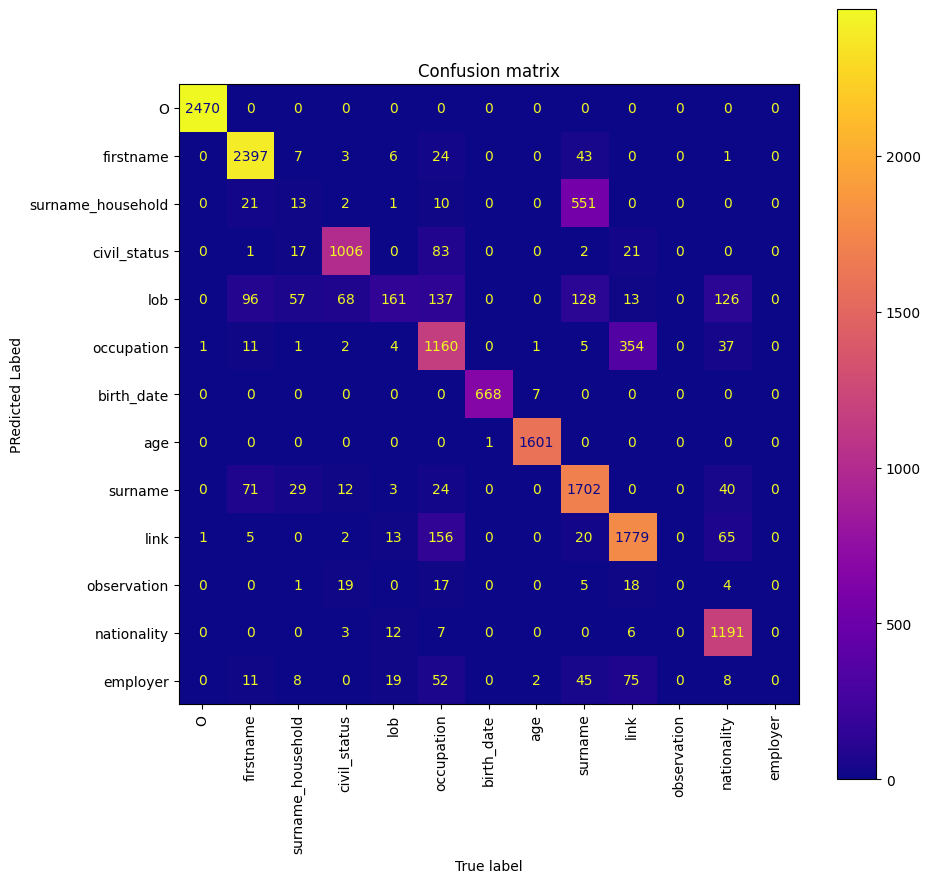

In [47]:
labels_list = list(tag2id)
cm = confusion_matrix(merged_true_labels, merged_true_predictions, labels=labels_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical', cmap="plasma")
ax.set_xlabel('True label')
ax.set_ylabel('PRedicted Labed')

# Set title
plt.title("Confusion matrix")
plt.show()

In [48]:
print(classification_report(merged_true_labels, merged_true_predictions, labels=labels_list))

                   precision    recall  f1-score   support

                O       1.00      1.00      1.00      2470
        firstname       0.92      0.97      0.94      2481
surname_household       0.10      0.02      0.04       598
     civil_status       0.90      0.89      0.90      1130
              lob       0.74      0.20      0.32       786
       occupation       0.69      0.74      0.71      1576
       birth_date       1.00      0.99      0.99       675
              age       0.99      1.00      1.00      1602
          surname       0.68      0.90      0.78      1881
             link       0.79      0.87      0.83      2041
      observation       0.00      0.00      0.00        64
      nationality       0.81      0.98      0.89      1219
         employer       0.00      0.00      0.00       220

         accuracy                           0.85     16743
        macro avg       0.66      0.66      0.65     16743
     weighted avg       0.81      0.85      0.82     1

In [49]:
with torch.no_grad():
    data = test_dataset[0]
    inputs = data["input_ids"].unsqueeze(0).to(device)
    attention_masks = data["attention_mask"].unsqueeze(0).to(device)
    logits = model(inputs, attention_masks).logits.detach().cpu()
    labels = data["labels"].unsqueeze(dim=0)
    p = (np.array(logits), np.array(labels))
    dic = compute_metrics(p, return_pred_labels=True)
    accuracy = dic["accuracy"]
    true_labels = dic["labels"]
    true_predictions = dic["predictions"]

print(tokenizer.decode(inputs.to("cpu").tolist()[0], skip_special_tokens=True))
print(true_labels)
print(true_predictions)

Mamer Joseph prop. exploitant chef 1877 française Sarlat. Mamer Marie cultivatrice ép. 1877 française St André - Allier. Mamer Alfred ébéniste fils Chaumond 1914 française Notre Dame. Meigot François ancien boulanger chef 1864 française La Buchellerie. Boyer Maria domestique s parenté 1894 française Savignac. Pouliquen François fermier chef 1987 française Locmélar - Finistère. Pouliquen Anne cultv. ép. 1895 française St Sauveur - Finistère. Pouliquen François s. p fils 1927 française Cubjac. Riou Goulven cultiv. domestique 1914 française Bourg Blanc - Finistère. Basbayou Jean chef Laforet 1875 française Nigrondes. Barbayou Marie cultivatrice 1880 française Pierrefitte. Basbarjou Louis idem fils 1907 française Champaneuil. Basbarjou Joanna idem fille 1910 française Grun. Basbarjou Albert idem fils 1912 française Atus. Basbarjou Madeleine idem fille 1915 française idem. Basbariou Jeanne idem idem 1917 française Notre Dame. Basbarjou Germaine idem idem 1922 française idem. Basbarjou Eugén

In [ ]:
def mismatch(data, label_mismatched, nb_errors = 50):
    with torch.no_grad():
        nb_count_errors = 0
        for i, data in enumerate(test_dataset):
            data = test_dataset[i]
            inputs = data["input_ids"].unsqueeze(0).to(device)
            attention_masks = data["attention_mask"].unsqueeze(0).to(device)
            logits = model(inputs, attention_masks).logits.detach().cpu()
            labels = data["labels"].unsqueeze(dim=0)
            p = (np.array(logits), np.array(labels))
            dic = compute_metrics(p, return_pred_labels=True)
            accuracy = dic["accuracy"]
            true_labels = dic["labels"]
            true_predictions = dic["predictions"]

            count_O = 0
            merged_true_predictions, merged_true_labels =  merge_tokens(true_predictions, true_labels)
            for true_label, true_prediction in zip(merged_true_predictions, merged_true_labels):

                if true_label == "O":
                    count_O += 1
                else:
                    if true_label != true_prediction and (true_label == label_mismatched or true_prediction == label_mismatched):
                        nb_count_errors += 1
                        print(nb_count_errors)
                        print(true_label)
                        print(true_prediction)
                        print(tokenizer.decode(inputs.to("cpu").tolist()[0], skip_special_tokens=True).split('.')[count_O])
                        print(" ")
            if nb_count_errors > nb_errors:
                break

In [ ]:
i=3
print(labels_list[i])
mismatch(test_dataset, labels_list[i])

observation
1
lob
observation
 Pironon Jean Baptiste néant fils 1923 française St Flour
 
2
civil_status
observation
 Pradier Sicaire cultiv 38 Garçon dit Voailles
 
3
lob
observation
 Philippe Léa idem pupille 1899 française assistance publique
 
4
link
observation
 Charpentier Marie cultivatrice veuve
 
5
civil_status
observation
 Martin Jean cult chef de ménage 48 Garçon célibatire
 
6
civil_status
observation
 Raymond Marie sans profession 67 Fille célibataire
 
7
civil_status
observation
 Biscuit Jean cultivateur chef de ménage 76 Veuf veuf ADAM
 
8
civil_status
observation
Arveuf Marie sa femme 47 Femme mariée Veuve Travignon
 
9
civil_status
observation
 Espéron Jacques sans profession 40 Homme marié indigent secouru par la charite
 
10
link
observation
 Junet Annette sa femme 41 Femme mariée idem
 
11
link
observation
 Espéron Marie leur fille 20 Fille idem
 
12
civil_status
observation
 Espéron Jean leur fils 10 Garçon idem - idiot
 
13
civil_status
observation
 Jury Louise sa